In [2]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import ttest_ind

In [3]:
top52 = pd.read_csv('papers_with_ds_2_20.csv',index_col=0)

In [5]:
top52.head()

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w12_percn,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn,cc
142,Focusing,1988.0,[],"[{'name': 'Eric Krotkov', 'sid': '23362393', '...",NaN,10.1007/bf00127822,"{'_id': '548267b8582fc50b5e32e70f', 'raw': 'In...",International Journal of Computer Vision,1,-0.336391,...,0.024115,-0.168367,0.023564,-0.179612,0.020331,-0.207965,0.015785,-0.228571,0.012525,132
152,FreeSurfer.,2012.0,[],"[{'_id': '5487ec66dabfae8a11fb3eb2', 'name': '...",NaN,10.1016/j.neuroimage.2012.01.021,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,1,-0.031504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467
153,FSL.,2012.0,[],"[{'_id': '560175f345cedb3395e5a447', 'name': '...",NaN,10.1016/j.neuroimage.2011.09.015,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,5,-0.205087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
559,Erlang,2010.0,"['telecom system', 'component isolation', 'net...","[{'_id': '53f430eadabfaee1c0a6124a', 'name': '...",NaN,10.1145/1810891.1810910,"{'_id': '555036f57cea80f954169e28', 'raw': 'Co...",Commun. ACM,1,-0.372093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
1068,Counterfactuals,1986.0,"['logical language', 'commonsense non-monotoni...","[{'_id': '53f430fcdabfaee4dc747309', 'name': '...",NaN,10.1016/0004-3702(86)90067-6,"{'_id': '555036e77cea80f9541662c7', 'raw': 'Ar...",Artif. Intell.,2,-0.035907,...,0.136281,-0.031016,0.116404,-0.034309,0.094418,-0.034483,0.081736,-0.036332,0.067303,78


In [4]:
ds10_ds = top52[(top52['year']<=2010) & (top52['year']>=2000)]

In [42]:
ds10_ds = ds10_ds[ds10_ds['w2_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w4_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w6_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w8_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w10_ds']!=0]

In [46]:
ds10_ds['delta_ds_42'] = (ds10_ds['w4_ds'] - ds10_ds['w2_ds'])/2
ds10_ds['delta_ds_64'] = (ds10_ds['w6_ds'] - ds10_ds['w4_ds'])/2
ds10_ds['delta_ds_86'] = (ds10_ds['w8_ds'] - ds10_ds['w6_ds'])/2
ds10_ds['delta_ds_108'] = (ds10_ds['w10_ds'] - ds10_ds['w8_ds'])/2

In [6]:
ds10_ds['acc_ds_62'] = ds10_ds['delta_ds_64'] - ds10_ds['delta_ds_42']
ds10_ds['acc_ds_84'] = ds10_ds['delta_ds_86'] - ds10_ds['delta_ds_64']
ds10_ds['acc_ds_106'] = ds10_ds['delta_ds_108'] - ds10_ds['delta_ds_86']
# ds10_ds['acc_ds_108'] = ds10_ds['w10_ds'] - ds10_ds['w8_ds']

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/1213783997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds10_ds['acc_ds_62'] = ds10_ds['delta_ds_64'] - ds10_ds['delta_ds_42']
/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/1213783997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds10_ds['acc_ds_84'] = ds10_ds['delta_ds_86'] - ds10_ds['delta_ds_64']
/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/1213783997.py:3: SettingWithCopyWarning: 
A value

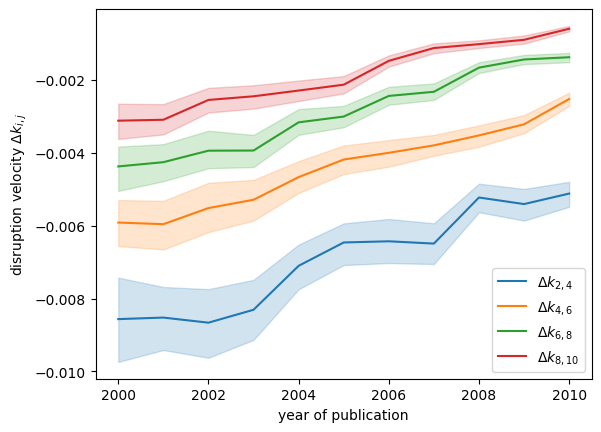

In [16]:
sn.lineplot(data=ds10_ds,x='year',y='delta_ds_42',label=r'$\Delta k_{2,4}$')
sn.lineplot(data=ds10_ds,x='year',y='delta_ds_64',label=r'$\Delta k_{4,6}$')
sn.lineplot(data=ds10_ds,x='year',y='delta_ds_86',label=r'$\Delta k_{6,8}$')
sn.lineplot(data=ds10_ds,x='year',y='delta_ds_108',label=r'$\Delta k_{8,10}$')
plt.ylabel(r'disruption velocity $\Delta k_{i,j}$')
plt.xlabel('year of publication')
plt.legend()

In [47]:
doids = ds10_ds.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['delta_ds_42','delta_ds_64','delta_ds_86','delta_ds_108'],var_name = 'w',value_name='ds')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/615289402.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D_{4,6}$',r'$\Delta D_{6,8}$',r'$\Delta D_{8,10}$'])


[Text(0, 0, '$\\Delta D^{2,4}$'),
 Text(1, 0, '$\\Delta D_{4,6}$'),
 Text(2, 0, '$\\Delta D_{6,8}$'),
 Text(3, 0, '$\\Delta D_{8,10}$')]

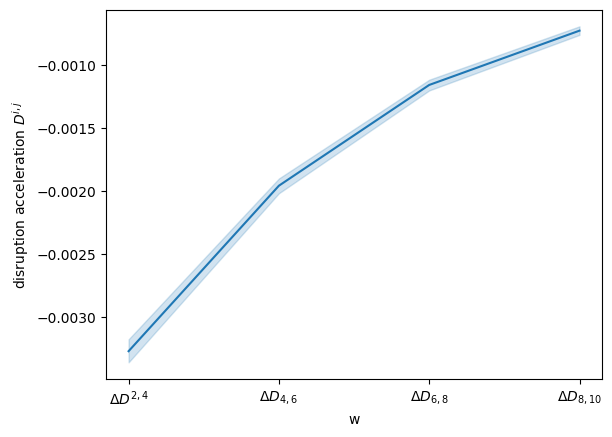

In [77]:
fig, ax = plt.subplots()

sn.lineplot(data=doids,x='w',y='ds')
plt.ylabel(r'disruption acceleration $D^{i,j}$')
ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D_{4,6}$',r'$\Delta D_{6,8}$',r'$\Delta D_{8,10}$'])


In [56]:
dis = ds10_ds[ds10_ds['w2_ds']>0]

In [57]:
len(dis)

4360

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/557959377.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D^{4,6}$',r'$\Delta D^{6,8}$',r'$\Delta D^{8,10}$'])


Text(0.5, 0, '')

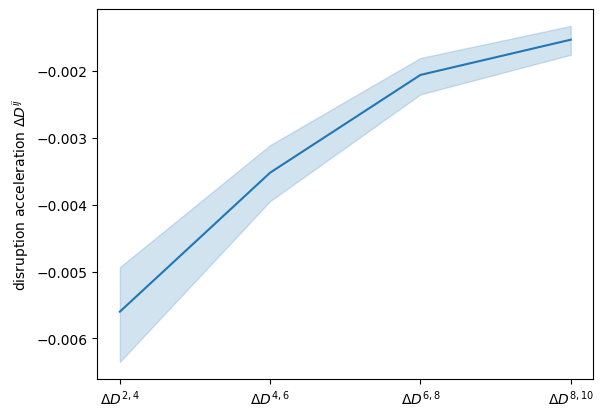

In [83]:
dis = ds10_ds[(ds10_ds['w2_ds']>0.001)]

fig, ax = plt.subplots()

sn.lineplot(data=doids[doids['doi'].isin(dis['doi'].values)],x='w',y='ds')
plt.ylabel(r'disruption acceleration $\Delta D^{ij}$')
ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D^{4,6}$',r'$\Delta D^{6,8}$',r'$\Delta D^{8,10}$'])
plt.xlabel('')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/799699172.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$k_{2,4}$',r'$k_{4,6}$',r'$k_{6,8}$',r'$k_{8,10}$'])


Text(0.5, 0, '')

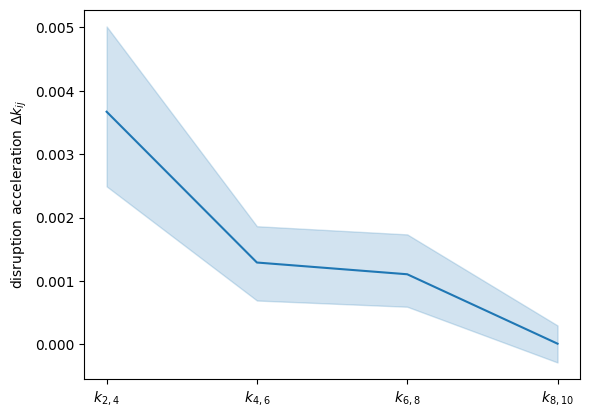

In [76]:
dis = ds10_ds[(ds10_ds['w10_ds']>0)]

fig, ax = plt.subplots()

sn.lineplot(data=doids[doids['doi'].isin(dis['doi'].values)],x='w',y='ds')
plt.ylabel(r'disruption acceleration $\Delta k_{ij}$')
ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D_{4,6}$',r'$\Delta D_{6,8}$',r'$\Delta D_{8,10}$'])
plt.xlabel('')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16062/3821117518.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D^{4,6}$',r'$\Delta D^{6,8}$',r'$\Delta D^{8,10}$'])


Text(0.5, 0, '')

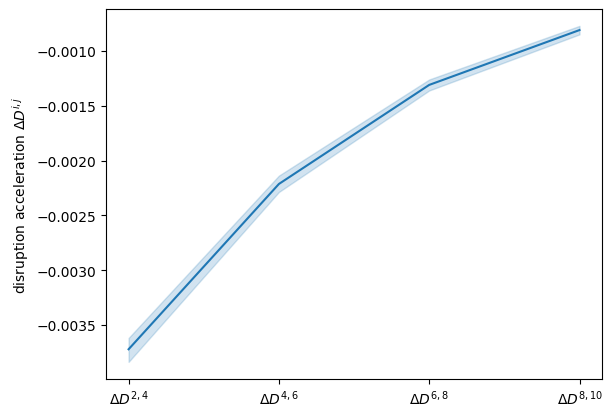

In [82]:
dis = ds10_ds[ds10_ds['w2_ds']<-0.001]

fig, ax = plt.subplots()

sn.lineplot(data=doids[doids['doi'].isin(dis['doi'].values)],x='w',y='ds')
plt.ylabel(r'disruption acceleration $\Delta D^{i,j}$')
ax.set_xticklabels([r'$\Delta D^{2,4}$',r'$\Delta D^{4,6}$',r'$\Delta D^{6,8}$',r'$\Delta D^{8,10}$'])
plt.xlabel('')

<AxesSubplot:xlabel='w', ylabel='ds'>

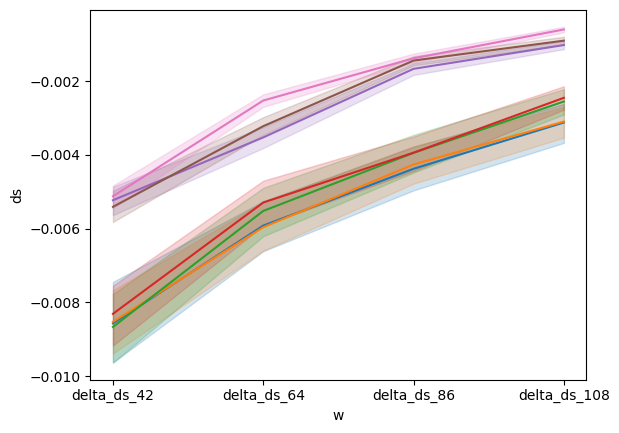

In [25]:
sn.lineplot(data=doids[doids['year']==2000.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2001.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2002.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2003.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2008.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2009.0],x='w',y='ds')
sn.lineplot(data=doids[doids['year']==2010.0],x='w',y='ds')